In [190]:
import mplfinance as mpf
import pandas as pd
import yfinance as yf

df = yf.download('BTC-USD', start = "2025-01-18", end = "2025-01-19", interval = '5m')

[*********************100%***********************]  1 of 1 completed


In [191]:
df.columns = df.columns.get_level_values(0)

df.rename(columns={
    'Open': 'Open',
    'High': 'High',
    'Low': 'Low',
    'Close': 'Close',
    'Volume': 'Volume'
}, inplace=True)
df.index = pd.to_datetime(df.index)


In [192]:
df

Price,Adj Close,Close,High,Low,Open,Volume
Datetime,,,,,,
2025-01-18 00:00:00+00:00,104139.953125,104139.953125,104172.531250,104114.414062,104114.414062,0
2025-01-18 00:05:00+00:00,104336.500000,104336.500000,104336.500000,104237.414062,104237.414062,41443328
2025-01-18 00:10:00+00:00,104352.453125,104352.453125,104382.625000,104319.320312,104319.320312,68100096
2025-01-18 00:15:00+00:00,104450.242188,104450.242188,104455.789062,104369.625000,104369.625000,0
2025-01-18 00:20:00+00:00,104318.578125,104318.578125,104338.562500,104318.578125,104338.562500,0
...,...,...,...,...,...,...
2025-01-18 23:35:00+00:00,104510.953125,104510.953125,104513.890625,104391.351562,104415.070312,22663168
2025-01-18 23:40:00+00:00,104437.953125,104437.953125,104559.734375,104437.953125,104523.601562,76271616
2025-01-18 23:45:00+00:00,104293.429688,104293.429688,104386.695312,104287.335938,104386.695312,196608


In [193]:
df

Price,Adj Close,Close,High,Low,Open,Volume
Datetime,,,,,,
2025-01-18 00:00:00+00:00,104139.953125,104139.953125,104172.531250,104114.414062,104114.414062,0
2025-01-18 00:05:00+00:00,104336.500000,104336.500000,104336.500000,104237.414062,104237.414062,41443328
2025-01-18 00:10:00+00:00,104352.453125,104352.453125,104382.625000,104319.320312,104319.320312,68100096
2025-01-18 00:15:00+00:00,104450.242188,104450.242188,104455.789062,104369.625000,104369.625000,0
2025-01-18 00:20:00+00:00,104318.578125,104318.578125,104338.562500,104318.578125,104338.562500,0
...,...,...,...,...,...,...
2025-01-18 23:35:00+00:00,104510.953125,104510.953125,104513.890625,104391.351562,104415.070312,22663168
2025-01-18 23:40:00+00:00,104437.953125,104437.953125,104559.734375,104437.953125,104523.601562,76271616
2025-01-18 23:45:00+00:00,104293.429688,104293.429688,104386.695312,104287.335938,104386.695312,196608


In [194]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the Renko transformation
class Renko:
    def __init__(self, atr_period=14):
        self.atr_period = atr_period  # Default ATR period
        self.renko_df = pd.DataFrame()

    def average_true_range(self, df):
        # Calculate True Range (TR)
        df['H-L'] = df['High'] - df['Low']
        df['H-PC'] = abs(df['High'] - df['Close'].shift(1))
        df['L-PC'] = abs(df['Low'] - df['Close'].shift(1))
        
        # True Range is the maximum of these three values
        df['TR'] = df[['H-L', 'H-PC', 'L-PC']].max(axis=1)
        
        # Calculate the ATR over the rolling window
        df['ATR'] = df['TR'].rolling(window=self.atr_period).mean()
        
        return df

    def transform(self, df):
        # Calculate ATR first
        df = self.average_true_range(df)
        
        # Start Renko transformation using ATR as the brick size
        renko_bricks = []
        previous_close = df['Close'].iloc[0]
        for i, close in enumerate(df['Close']):
            brick_size = df['ATR'].iloc[i]  # Use ATR as the brick size for each period
            while abs(close - previous_close) >= brick_size:
                if close > previous_close:
                    renko_bricks.append({'Brick_Color': 'Green', 'Price': previous_close + brick_size})
                    previous_close += brick_size
                else:
                    renko_bricks.append({'Brick_Color': 'Red', 'Price': previous_close - brick_size})
                    previous_close -= brick_size
        
        self.renko_df = pd.DataFrame(renko_bricks)

# Generate the Renko DataFrame

renko = Renko(atr_period=14)
renko.transform(df)

# Get the Renko DataFrame
renko_df = renko.renko_df
print(renko_df)

renko_df.to_csv('renko_1min.csv')

    Brick_Color          Price
0         Green  104229.295201
1         Green  104318.637277
2         Green  104407.979353
3         Green  104495.570312
4           Red  104411.349330
..          ...            ...
135       Green  104356.080357
136       Green  104438.117746
137       Green  104523.700893
138         Red  104442.089286
139         Red  104346.552455

[140 rows x 2 columns]


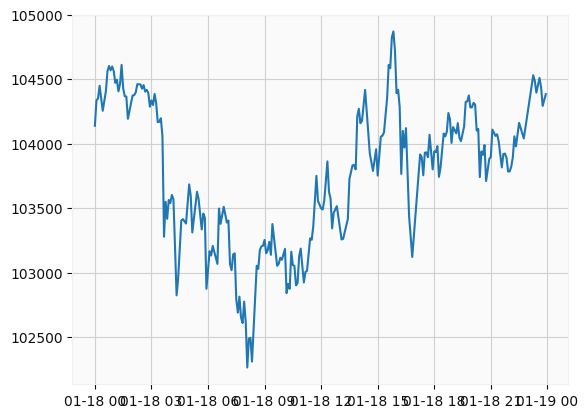

In [195]:
plt.plot(df['Close'])

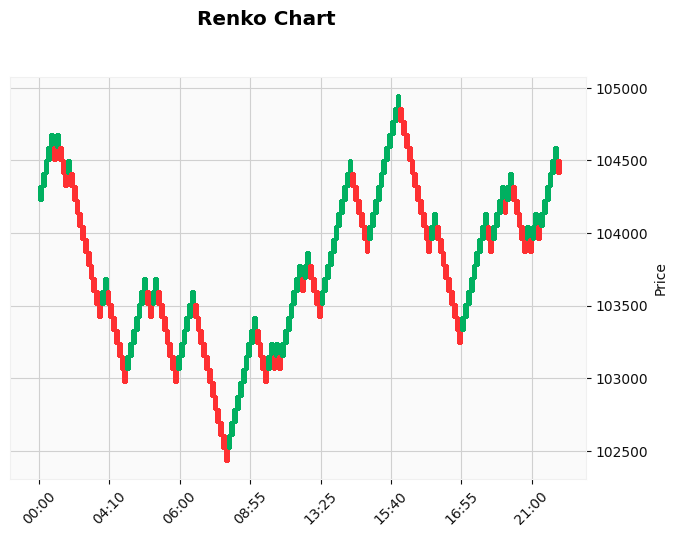

In [198]:
renko_params = {'brick_size': 90}  # Set the brick size in the renko_params
mpf.plot(df, type='renko', renko_params=renko_params, style='yahoo', title="Renko Chart", ylabel="Price")